<a href="https://colab.research.google.com/github/sap-tarshi-ghosh/AML-Dataset/blob/main/code/02_Intensity_Transformations_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Image

In [28]:
from PIL import Image

image = Image.open('low-contrast-04.jpg').convert('L')

width, height = image.size

pixels = list(image.getdata())

#converting the image into a 2d list
img = []
for y in range(height):
  row = []
  for x in range(width):
    row.append(pixels[y * width + x])
  img.append(row)



In [ ]:
image2 = Image.open('cameraman.webp').convert('L')

width2, height2 = image2.size

pixels2 = list(image2.getdata())

#converting the image into a 2d list
img2 = []
for y in range(height2):
  row = []
  for x in range(width2):
    row.append(pixels2[y * width2 + x])
  img2.append(row)

# Image Negative

In [ ]:
img_neg = []  #here img_neg means negative image

for y in range(height):
  row = []
  for x in range(width):
    old_val = img[y][x]
    new_val = 255 - old_val
    row.append(new_val)
  img_neg.append(row)

In [ ]:
img_neg2 = []  #here img_neg means negative image

for y in range(height2):
  row = []
  for x in range(width2):
    old_val = img2[y][x]
    new_val = 255 - old_val
    row.append(new_val)
  img_neg2.append(row)

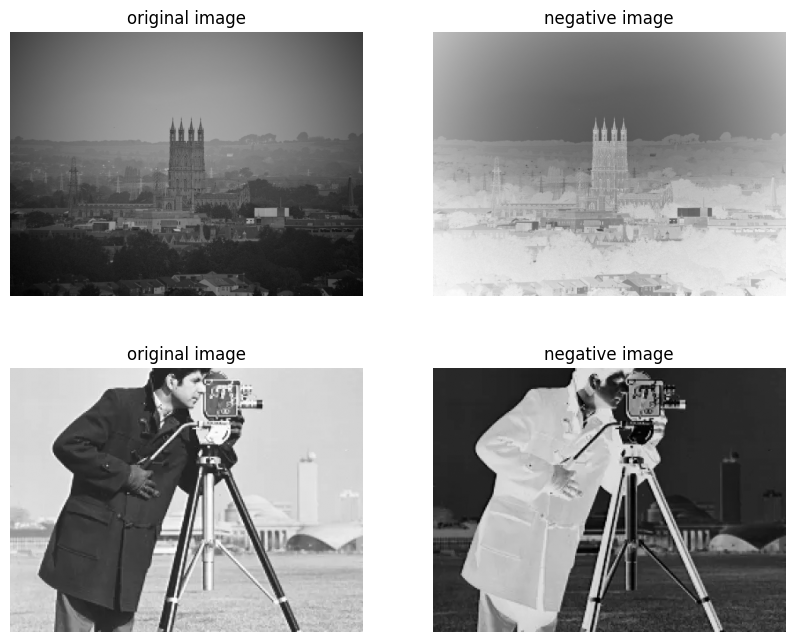

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

plt.subplot(2,2,1)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.title('original image')
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(img_neg, cmap='gray', vmin=0, vmax=255)
plt.title('negative image')
plt.axis('off')

#image 2
plt.subplot(2,2,3)
plt.imshow(img2, cmap='gray', vmin=0, vmax=255)
plt.title('original image')
plt.axis('off')

plt.subplot(2,2,4)
plt.imshow(img_neg2, cmap='gray', vmin=0, vmax=255)
plt.title('negative image')
plt.axis('off')

plt.show()

Minimum and maximum intensity values are stored

In [ ]:
r_min = 255
r_max = 0

for y in range(height):
  for x in range(width):
    val = img[y][x]
    if val > r_max:
      r_max = img[y][x]
    if val < r_min:
      r_min = img[y][x]

print(f'Minimum intensity: {r_min}\nMaximum intensity: {r_max}')

Minimum intensity: 0
Maximum intensity: 198


# Contrast Stretching

Straching the previous min and max intensity values in a range of (0 - 255)

In [ ]:
streached_img = []

for y in range(height):
  row = []
  for x in range(width):
    old_val = img[y][x]
    if r_min != r_max:
      new_val = ((old_val - r_min)/(r_max - r_min)) * 255
      row.append(new_val)
  streached_img.append(row)


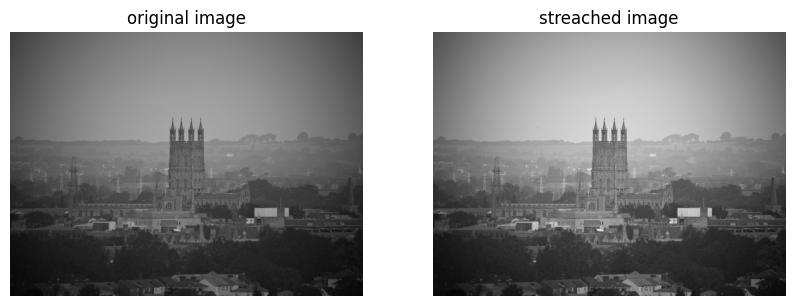

In [ ]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray', vmin= 0, vmax= 255)
plt.axis('off')
plt.title('original image')

plt.subplot(1, 2, 2)
plt.imshow(streached_img, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title('streached image')

plt.show()

# Power Law Transformation (Gamma)

In [29]:
gamma = 0.5
gamma_img = []

for y in range(height):
  row = []
  for x in range(width):
    old_val = img[y][x]
    new_val = 255 * ((old_val/255) ** gamma)
    row.append(new_val)
  gamma_img.append(row)

# print(gamma_img)

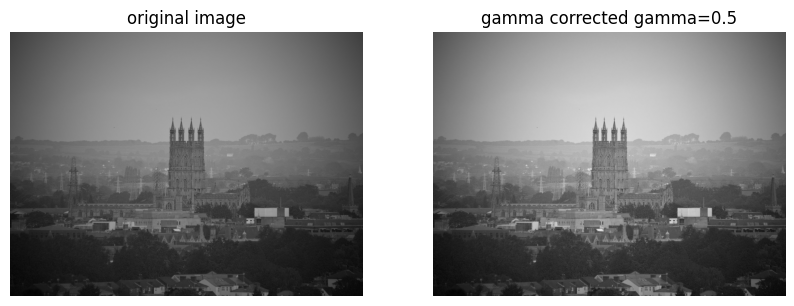

In [30]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray', vmin= 0, vmax= 255)
plt.axis('off')
plt.title('original image')

plt.subplot(1, 2, 2)
plt.imshow(streached_img, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title(f'gamma corrected gamma={gamma}')

plt.show()